In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import seaborn as sns
import numpy as np

In [2]:
atp_data=pd.read_csv('atp_data.csv', parse_dates=True, index_col='tourney_date')

In [3]:
atp_data['w_1stWon_p']=atp_data.w_1stWon/atp_data.w_1stIn
atp_data['l_1stWon_p']=atp_data.l_1stWon/atp_data.l_1stIn

In [4]:
atp_data['w_2ndWon_p']=atp_data.w_2ndWon/(atp_data.w_svpt-atp_data.w_1stIn)
atp_data['l_2ndWon_p']=atp_data.l_2ndWon/(atp_data.l_svpt-atp_data.l_1stIn)

In [5]:
atp_data['df_rank']=atp_data.apply(lambda row: row.winner_rank-row.loser_rank,axis=1)
atp_data['df_1st_won']=atp_data.apply(lambda row: row.w_1stWon_p-row.l_1stWon_p,axis=1)
atp_data['df_2nd_won']=atp_data.apply(lambda row: row.w_1stWon_p-row.l_1stWon_p,axis=1)
atp_data['df_age']=atp_data.apply(lambda row: row.winner_age-row.loser_age,axis =1)

In [7]:
# Who win the most matches from 2000 to 2018
atp_data.winner_name.value_counts().head()

Roger Federer     1118
Rafael Nadal       896
Novak Djokovic     807
David Ferrer       699
Andy Murray        635
Name: winner_name, dtype: int64

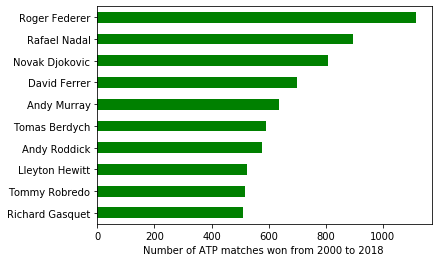

In [8]:
_ = atp_data.winner_name.value_counts().head(10).sort_values().plot(kind='barh',color='green')
_ = plt.xlabel('Number of ATP matches won from 2000 to 2018 ')

In [9]:
atp_data[atp_data.ATP_round=='F'].winner_name.value_counts().head()

Roger Federer     99
Rafael Nadal      80
Novak Djokovic    71
Andy Murray       45
Andy Roddick      32
Name: winner_name, dtype: int64

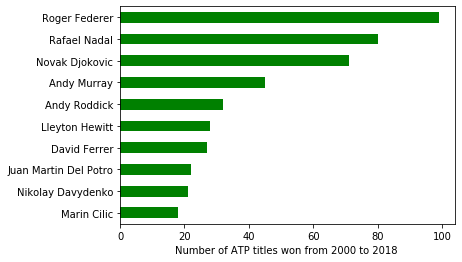

In [10]:
_ = atp_data[atp_data.ATP_round=='F'].winner_name.value_counts().head(10).sort_values().plot(kind='barh',color='green')
_ = plt.xlabel('Number of ATP titles won from 2000 to 2018 ')

In [11]:
# who win the most Grand Slam titles from 2000 to 2018 
atp_data[(atp_data.tourney_level=='G') & (atp_data.ATP_round=='F')].winner_name.value_counts().head()

Roger Federer         20
Rafael Nadal          17
Novak Djokovic        14
Andy Murray            3
Stanislas Wawrinka     3
Name: winner_name, dtype: int64

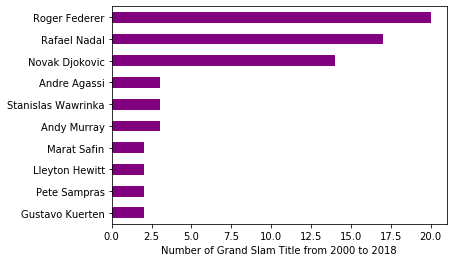

In [12]:
_=atp_data[(atp_data.tourney_level=='G') & (atp_data.ATP_round=='F')].winner_name.value_counts().head(10).sort_values().plot(kind='barh',color='purple')
_=plt.xlabel('Number of Grand Slam Title from 2000 to 2018')

In [13]:
# the games only has big3 winning
atp_data_big3_w=atp_data[(atp_data.winner_name.astype(str).isin(['Roger Federer','Novak Djokovic','Rafael Nadal']))]
atp_data_big3_l=atp_data[(atp_data.loser_name.astype(str).isin(['Roger Federer','Novak Djokovic','Rafael Nadal']))]

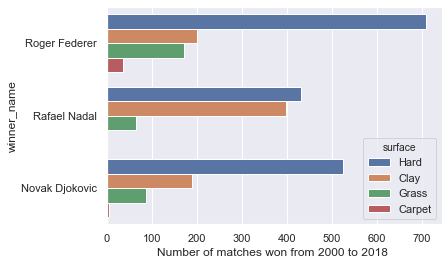

In [14]:
sns.set()
_=sns.countplot(y='winner_name',data=atp_data_big3_w, hue='surface')
_=plt.xlabel('Number of matches won from 2000 to 2018 ')

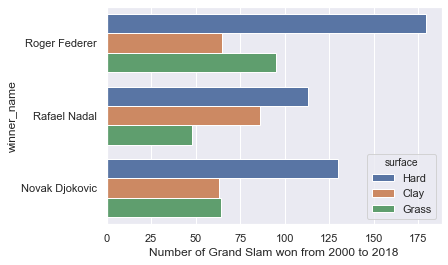

In [17]:
df1=atp_data_big3_w[atp_data_big3_w.tourney_level=='G']
_=sns.countplot(y='winner_name',data=df1, hue='surface')
_=plt.xlabel('Number of Grand Slam won from 2000 to 2018')

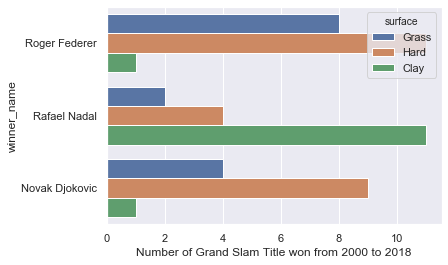

In [18]:
df2=atp_data_big3_w[(atp_data_big3_w.tourney_level=='G') & (atp_data_big3_w.ATP_round=='F')]
_=sns.countplot(y='winner_name',data=df2, hue='surface')
_=plt.xlabel('Number of Grand Slam Title won from 2000 to 2018')

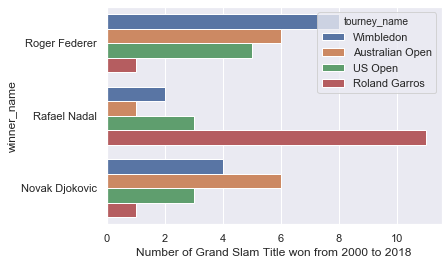

In [20]:
df2=atp_data_big3_w[(atp_data_big3_w.tourney_level=='G') & (atp_data_big3_w.ATP_round=='F')]
_=sns.countplot(y='winner_name',data=df2, hue='tourney_name')
_=plt.xlabel('Number of Grand Slam Title won from 2000 to 2018')

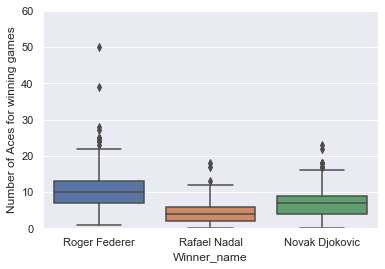

In [25]:
#Number of aces for each player for their winning games
df3=atp_data_big3_w[atp_data_big3_w.tourney_level=='G']
_ = sns.boxplot(x="winner_name", y="w_ace", data=df3)
_.set(xlabel='Winner_name', ylabel='Aces')
_.set(ylim=(0,60))
_=plt.ylabel('Number of Aces for winning games')

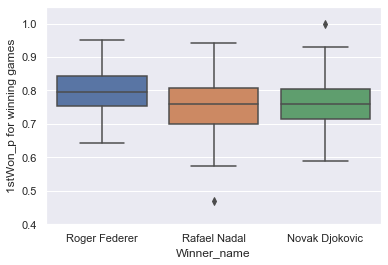

In [26]:
_ = sns.boxplot(x="winner_name", y="w_1stWon_p", data=df3)
_.set(xlabel='Winner_name', ylabel='w_1stWon_p')
_.set(ylim=(0.4,1.05))
_=plt.ylabel('1stWon_p for winning games')

In [28]:
df4=atp_data_big3_l[atp_data_big3_l.tourney_level=='G']

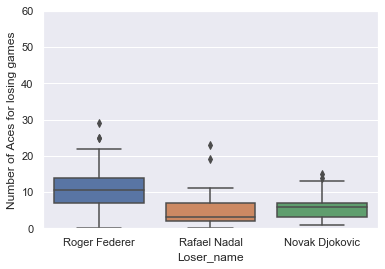

In [29]:
_ = sns.boxplot(x="loser_name", y="l_ace", data=df4)
_.set(xlabel='Loser_name', ylabel='Aces')
_.set(ylim=(0,60))
_=plt.ylabel('Number of Aces for losing games')

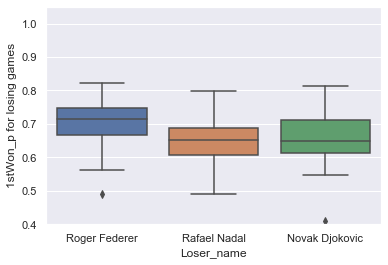

In [30]:
_ = sns.boxplot(x="loser_name", y="l_1stWon_p", data=df4)
_.set(xlabel='Loser_name', ylabel='1stWon_p')
_.set(ylim=(0.4,1.05))
_=plt.ylabel('1stWon_p for losing games')

In [31]:
pw = atp_data.groupby(['tourney_year','surface','winner_name'], as_index=False).agg(['count'])
pww = pw['tourney_id'].reset_index()

pl = atp_data.groupby(['tourney_year','surface','loser_name'], as_index=False).agg(['count'])
pll = pl['tourney_id'].reset_index()
pww.columns = ['tourney_year','surface','player_name','wins']
pll.columns = ['tourney_year','surface','player_name','loses']

dfs_final = pd.merge(pww,pll,on=['tourney_year','surface','player_name'],how='outer')
#dfs_final[dfs_fnal.player_name=='Roger Federer'].head()
dfs_final=dfs_final.fillna(0)
dfs_final['win_p']=dfs_final.wins/(dfs_final.wins+dfs_final.loses)

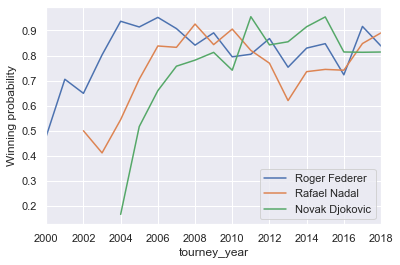

In [32]:
_=dfs_final[dfs_final.player_name=='Roger Federer'].groupby('tourney_year').win_p.mean().plot()
_=dfs_final[dfs_final.player_name=='Rafael Nadal'].groupby('tourney_year').win_p.mean().plot()
_=dfs_final[dfs_final.player_name=='Novak Djokovic'].groupby('tourney_year').win_p.mean().plot()
_=plt.legend(('Roger Federer','Rafael Nadal','Novak Djokovic'))
_=plt.ylabel('Winning probability')

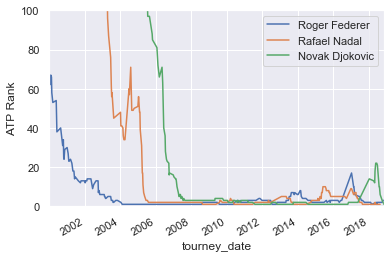

In [33]:
_=atp_data[(atp_data.winner_name=='Roger Federer')]['winner_rank'].plot()
_=atp_data[(atp_data.winner_name=='Rafael Nadal')]['winner_rank'].plot()
_=atp_data[(atp_data.winner_name=='Novak Djokovic')]['winner_rank'].plot()
_=plt.ylim(0,100)
_=plt.legend(('Roger Federer','Rafael Nadal','Novak Djokovic'))
_=plt.ylabel('ATP Rank')

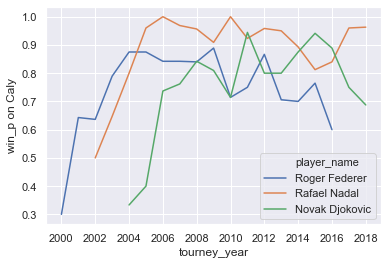

In [34]:
dfs_c=dfs_final[(dfs_final.player_name.astype(str).isin(['Rafael Nadal','Roger Federer','Novak Djokovic'])) &(dfs_final.surface=='Clay')]
_=sns.lineplot(x='tourney_year',y='win_p',hue='player_name',data=dfs_c)
_=plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
_=plt.ylabel('win_p on Caly')

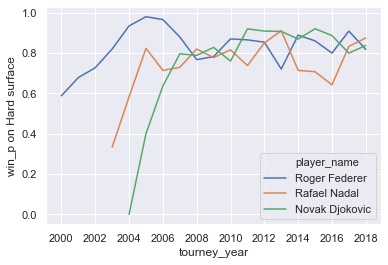

In [35]:
dfs_h=dfs_final[(dfs_final.player_name.astype(str).isin(['Rafael Nadal','Roger Federer','Novak Djokovic'])) &(dfs_final.surface=='Hard')]
_=sns.lineplot(x='tourney_year',y='win_p',hue='player_name',data=dfs_h)
_=plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
_=plt.ylabel('win_p on Hard surface')

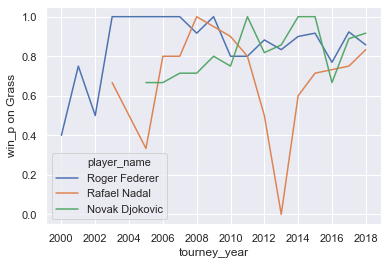

In [36]:
dfs_g=dfs_final[(dfs_final.player_name.astype(str).isin(['Rafael Nadal','Roger Federer','Novak Djokovic'])) &(dfs_final.surface=='Grass')]
_=sns.lineplot(x='tourney_year',y='win_p',hue='player_name',data=dfs_g)
_=plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
_=plt.ylabel('win_p on Grass')

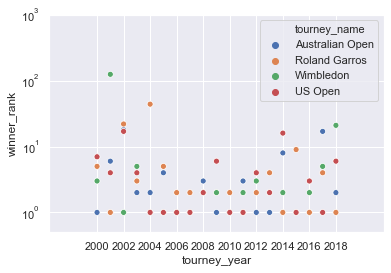

In [37]:
atp_title_G=atp_data[(atp_data.tourney_level=='G') & (atp_data.ATP_round=='F')]
_=sns.scatterplot(x='tourney_year', y='winner_rank',data=atp_title_G,hue='tourney_name')
_=plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
_=plt.yscale('log')
_=plt.margins(0.2)
_=plt.ylim(0.5,1000)

[Text(0, 0.5, '1st_won percentage difference'), Text(0.5, 0, 'tourney_name')]

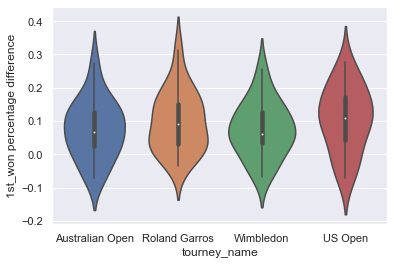

In [38]:
#atp_title_G=atp_data[atp_data.tourney_level=='G']
_ = sns.violinplot(x="tourney_name", y="df_1st_won", data=atp_title_G)
_.set(xlabel='tourney_name', ylabel='1st_won percentage difference')
#_.set(ylim=(-0.4, 0.4))

[Text(0, 0.5, '2nd won percentage difference'), Text(0.5, 0, 'tourney_name')]

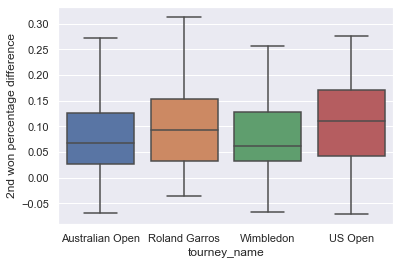

In [39]:
_ = sns.boxplot(x="tourney_name", y="df_2nd_won", data=atp_title_G)
_.set(xlabel='tourney_name', ylabel='2nd won percentage difference')
#_.set(ylim=(-0.4,0.4))

[Text(0, 0.5, 'age difference between winner and loser'),
 Text(0.5, 0, 'tourney_name')]

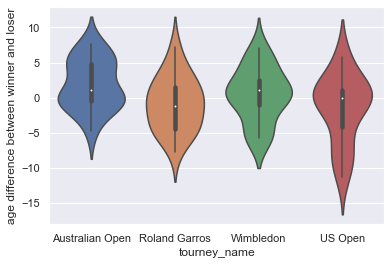

In [40]:
_ = sns.violinplot(x="tourney_name", y="df_age", data=atp_title_G)
_.set(xlabel='tourney_name', ylabel='age difference between winner and loser')
#_.set(ylim=(-0.4,0.4))

[Text(0, 0.5, 'rank difference between winner and loser'),
 Text(0.5, 0, 'tourney_name')]

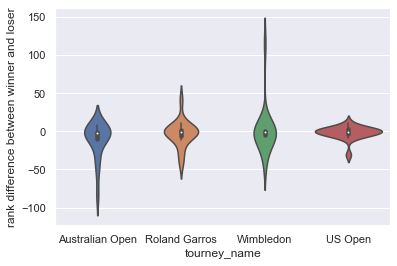

In [41]:
_ = sns.violinplot(x="tourney_name", y="df_rank", data=atp_title_G)
_.set(xlabel='tourney_name', ylabel='rank difference between winner and loser')
#_.set(ylim=(-0.4,0.4))

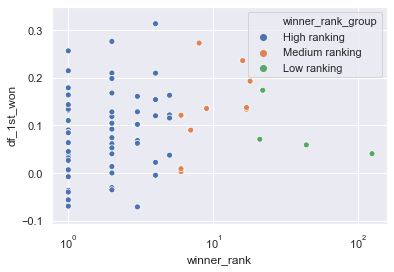

In [50]:
def f(row):
    if row.winner_rank <=5:
         val='High ranking'
    elif (row.winner_rank) >5 and (row.winner_rank) <=20:
         val='Medium ranking'
    else:
         val='Low ranking'
    return val
atp_data['winner_rank_group']=atp_data.apply(f, axis=1)
atp_data_1=atp_data[(atp_data.ATP_round=='F') & (atp_data.tourney_level=='G')]
_=sns.scatterplot(x='winner_rank',y='df_1st_won',hue='winner_rank_group',data=atp_data_1)
#_=plt.xticks([2000,2002,2004,2006,2008,2010, 2012,2014,2016, 2018])
_=plt.xscale('log')

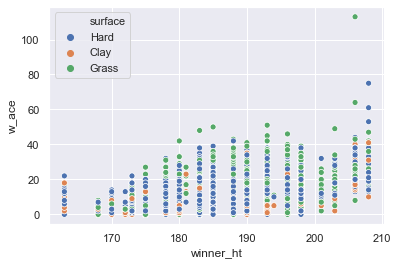

In [51]:
atp_data_G=atp_data[(atp_data.tourney_level=='G')]# & (atp_data.tourney_name=='US Open')]# &(atp_data.ATP_round!='R64')]
atp_height_ace=atp_data_G.groupby(atp_data_G.winner_name)['w_ace','winner_ht'].mean()
_=sns.scatterplot(x='winner_ht',y='w_ace',data=atp_data_G,hue='surface')

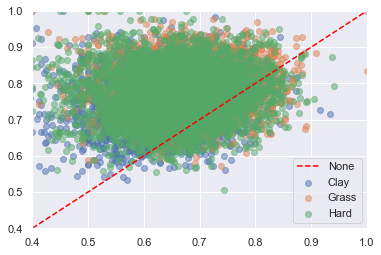

In [146]:
groups = atp_data_G.groupby(atp_data_G.surface)

# Plot
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
     plt.scatter(group.l_1stWon_p, group.w_1stWon_p,label=name,alpha=0.5)
s=pd.Series([0,1])
s.plot.line(linestyle='--',c='red')
plt.ylim(0.4,1)
plt.xlim(0.4,1)
plt.legend()
